In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.optimizers import SGD

/home/nischita/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
# random seed
seed = 7
numpy.random.seed(seed)

# load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten each 28*28 image to a single 784 vector
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [8]:
# Normalization of inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# One hot encoding of outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
# Define the baseline model
def baseline_model():
	model = Sequential()
	model.add(Dense(784, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(200, kernel_initializer='normal', activation='tanh'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
	return model

# Build model
model = baseline_model()
# Fit the model
History = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 12s - loss: 0.2039 - acc: 0.9383 - val_loss: 0.1025 - val_acc: 0.9689
Epoch 2/10
 - 12s - loss: 0.0747 - acc: 0.9785 - val_loss: 0.0781 - val_acc: 0.9740
Epoch 3/10
 - 12s - loss: 0.0487 - acc: 0.9864 - val_loss: 0.0635 - val_acc: 0.9797
Epoch 4/10
 - 12s - loss: 0.0340 - acc: 0.9912 - val_loss: 0.0593 - val_acc: 0.9816
Epoch 5/10
 - 12s - loss: 0.0249 - acc: 0.9941 - val_loss: 0.0569 - val_acc: 0.9826
Epoch 6/10
 - 12s - loss: 0.0185 - acc: 0.9965 - val_loss: 0.0565 - val_acc: 0.9827
Epoch 7/10
 - 12s - loss: 0.0142 - acc: 0.9975 - val_loss: 0.0527 - val_acc: 0.9841
Epoch 8/10
 - 12s - loss: 0.0109 - acc: 0.9985 - val_loss: 0.0528 - val_acc: 0.9852
Epoch 9/10
 - 12s - loss: 0.0085 - acc: 0.9991 - val_loss: 0.0534 - val_acc: 0.9838
Epoch 10/10
 - 12s - loss: 0.0069 - acc: 0.9994 - val_loss: 0.0521 - val_acc: 0.9847
Testing Accuracy: 98.47%


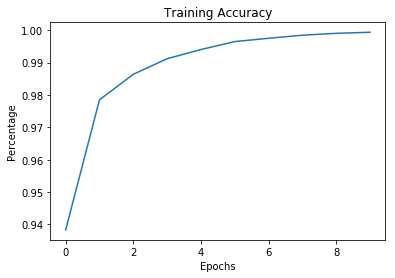

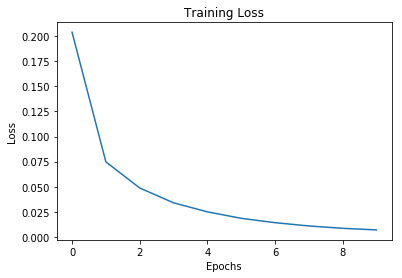

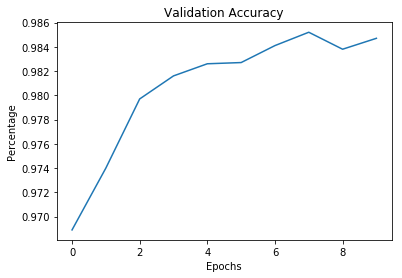

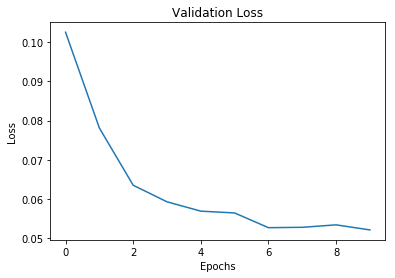

In [10]:
#Plotting graphs

epochs = range(10)
plt.figure(1) 
plt.plot(epochs,History.history['acc'],label='acc')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.title('Training Accuracy')
 
plt.figure(2) 
plt.plot(epochs,History.history['loss'],label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')


plt.figure(3)
plt.plot(epochs,History.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.title('Validation Accuracy')
 

plt.figure(4)
plt.plot(epochs,History.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss')


plt.show()